## Problem 1. Train a machine learning model using the training file to predict the values of the ‘Dataset’ column for the test file. ( Evaluation on the basis on Accuracy score)

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,QuantileTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV 

In [76]:
df = pd.read_csv("train.csv")

In [77]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,463.000000,466.000000
mean,45.321888,3.406438,1.503004,294.877682,82.633047,114.982833,6.491845,3.149356,0.954104,1.285408
std,15.697936,6.510448,2.823700,252.718859,192.801900,312.869109,1.096455,0.805285,0.333646,0.452094
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,46.000000,1.000000,0.300000,210.000000,36.000000,42.000000,6.600000,3.100000,0.960000,1.000000
75%,58.000000,2.575000,1.300000,298.000000,60.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,85.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [79]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1


In [80]:
#df.dropna(inplace=True)

### Adding 2 new columns Male and Female, removing Gender column

In [81]:
df["Male"] = df.Gender.apply(lambda x: 1 if x=='Male' else 0)
df['Female'] = df.Gender.apply(lambda x: 1 if x=='Female' else 0)

df.drop(['Gender'],inplace=True,axis=1)

### Removing outliers- Taking values between 5 and 95 percentile

In [82]:
# low = .05
# high = .95
# quant_df = df.quantile([low, high])

# new_df = df.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & (x < quant_df.loc[high,x.name])], axis=0)
new_df = df

In [83]:
new_df.fillna(new_df.mean(), inplace=True)

In [84]:
new_df.Male = df.Male
new_df.Female = df.Female
#new_df.Gender = df.Gender
new_df.Dataset = df.Dataset

### Removing Few Columns

In [85]:
#new_df = new_df[["Gender","Total_Bilirubin","Alamine_Aminotransferase","Total_Protiens","Albumin_and_Globulin_Ratio","Albumin","Dataset"]]

### Adding new Features

In [86]:
# new_df['t1'] = new_df.Alamine_Aminotransferase*new_df.Albumin
# new_df['t2'] = new_df.Alkaline_Phosphotase*new_df.Direct_Bilirubin
# new_df['t3'] = new_df.Total_Bilirubin*new_df.Total_Protiens



In [87]:
new_df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Male,Female
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,45.321888,3.406438,1.503004,294.877682,82.633047,114.982833,6.491845,3.149356,0.954104,1.285408,0.774678,0.225322
std,15.697936,6.510448,2.823700,252.718859,192.801900,312.869109,1.096455,0.805285,0.332568,0.452094,0.418243,0.418243
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000,0.000000,0.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000,1.000000,0.000000
50%,46.000000,1.000000,0.300000,210.000000,36.000000,42.000000,6.600000,3.100000,0.960000,1.000000,1.000000,0.000000
75%,58.000000,2.575000,1.300000,298.000000,60.000000,88.000000,7.200000,3.800000,1.100000,2.000000,1.000000,0.000000
max,85.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000,1.000000,1.000000


In [88]:
df = new_df

### Loading Test data

In [89]:
df_test = pd.read_csv("test.csv")

df_test["Male"] = df_test.Gender.apply(lambda x: 1 if x=='Male' else 0)
df_test['Female'] = df_test.Gender.apply(lambda x: 1 if x=='Female' else 0)
df_test.drop(['Gender'],inplace=True,axis=1)
df_test.fillna(df_test.mean(), inplace=True)

In [109]:
df_test.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Male,Female
0,46,0.8,0.2,160,31,40,7.3,3.8,1.10,1,0
1,15,0.8,0.2,380,25,66,6.1,3.7,1.50,1,0
2,66,4.2,2.1,159,15,30,7.1,2.2,0.40,0,1
3,32,0.6,0.1,237,45,31,7.5,4.3,1.34,1,0
4,60,2.6,1.2,171,42,37,5.4,2.7,1.00,1,0


### Making a Correlation HeatMap

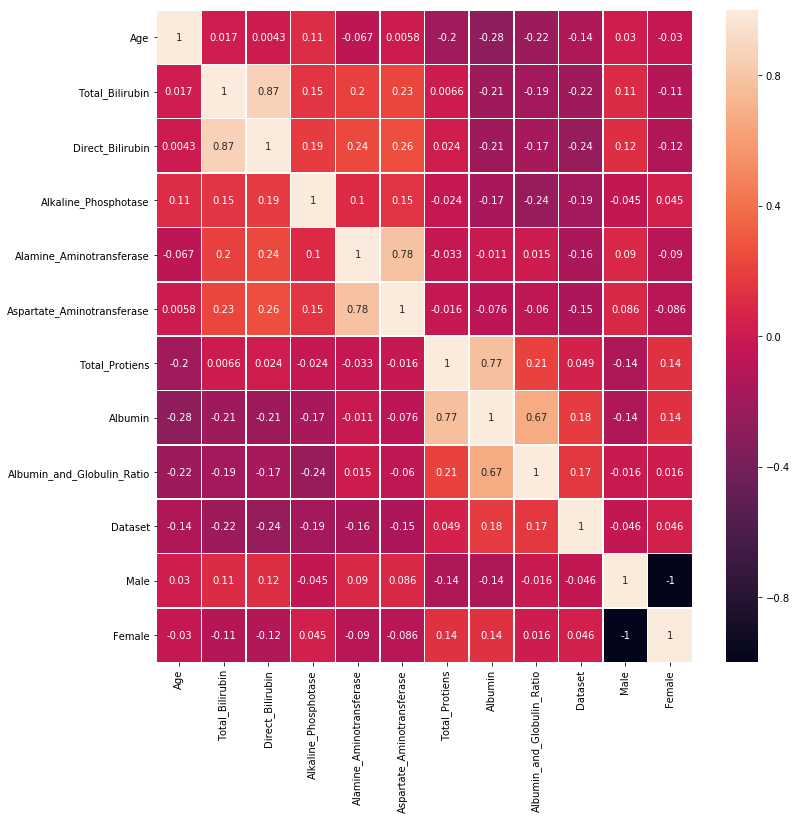

In [91]:
corr_matrix=df.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr_matrix,annot=True,linewidths=.5, ax=ax)

### Removing Total_Bilirubin column

In [92]:
columns = df.columns
columns = list(columns)
columns.remove('Dataset')
columns.remove('Total_Bilirubin')
print(columns)

['Age', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Male', 'Female']


In [93]:
X = df.loc[:,columns]

In [94]:
y = df.loc[:,'Dataset']

In [95]:
X.shape,y.shape

((466, 10), (466,))

### Train Test Split

In [123]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Scaling - Trying out different scalers

In [124]:
# scaler = StandardScaler()
# #scaler = MinMaxScaler()
# #scaler =  QuantileTransformer(output_distribution='normal')
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

### Function to check Different Models - Trying out different HyperParameters

#### Gaussian, Multinomial, Random Forest, Extreme RF, SVM, KNN, XGBoost, SVM with GridSearch

In [125]:
def checkmodel(x_train,y_train,x_test,y_test):
    clf = GaussianNB()
    clf.fit(x_train,y_train)
    print("Gaussian: ",clf.score(x_test,y_test))
    #clf = MultinomialNB()
    #clf.fit(x_train,y_train)
    #print("Gaussian: ",clf.score(x_test,y_test))
    clf = RandomForestClassifier(max_depth=None,min_samples_split=2,n_estimators=100)
    clf.fit(x_train,y_train)
    print("RF: ",clf.score(x_test,y_test))
    clf =  ExtraTreesClassifier(n_estimators=100, max_depth=None,min_samples_split=2,random_state=1) # Max 0.75
    clf.fit(x_train,y_train)
    print("Extreme RF: ",clf.score(x_test,y_test))
    clf = SVC(C = 1.5,gamma=1e-3,kernel='rbf') # 0.77 without scaling
    clf.fit(x_train,y_train)
    print("SVM: ",clf.score(x_test,y_test))
    clf = LogisticRegression(random_state=1,solver='liblinear',max_iter=1500,C= 21.5, penalty='l1')
    #clf = LogisticRegression(C= 21.5, penalty='l1')
    clf.fit(x_train,y_train)
    print("Logistic: ",clf.score(x_test,y_test))
    clf = KNeighborsClassifier()
    clf.fit(x_train,y_train)
    print("KNN: ",clf.score(x_test,y_test))
    clf = XGBClassifier()
    clf.fit(x_train, y_train)
    print("XGBoost: ",clf.score(x_test,y_test))
    parameters = { 'C':[1.5,2.5,3.5,10],'gamma': [1e-7, 1e-4,1e-1,1e-2,1e-3]}
    svc = SVC()
    clf = GridSearchCV(svc, parameters)
    clf.fit(x_train, y_train)
    print("GridSVM: ",clf.score(x_test,y_test))
    print('Best C:',clf.best_estimator_.C) 
    print('Best Gamma:',clf.best_estimator_.gamma)

In [126]:
checkmodel(x_train,y_train,x_test,y_test)

Gaussian:  0.425531914893617
RF:  0.648936170212766
Extreme RF:  0.7127659574468085
SVM:  0.6595744680851063
Logistic:  0.6808510638297872
KNN:  0.5957446808510638
XGBoost:  0.6276595744680851


C:\Users\Utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSVM:  0.723404255319149
Best C: 1.5
Best Gamma: 0.01


C:\Users\Utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [127]:
checkmodel(X,y,X,y)

Gaussian:  0.5643776824034334
RF:  1.0
Extreme RF:  1.0
SVM:  0.8090128755364807
Logistic:  0.7274678111587983
KNN:  0.7896995708154506
XGBoost:  0.8927038626609443


C:\Users\Utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSVM:  0.7145922746781116
Best C: 1.5
Best Gamma: 1e-07


### Using Extreme RF to classify

In [128]:
clf = ExtraTreesClassifier(n_estimators=100, max_depth=None,min_samples_split=2,random_state=1) # 0.77 without scaling
clf.fit(X,y)
yp = clf.predict(df_test.loc[:,columns])

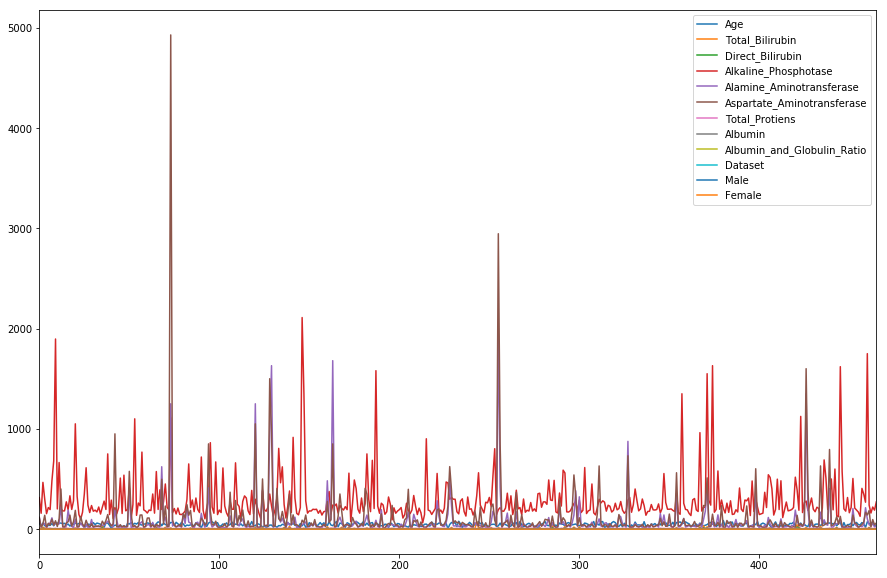

In [115]:
df.plot(figsize=(15,10))

### Saving Predictions

In [129]:
np.savetxt("predict-problem1.csv",yp,delimiter=",",fmt ="%1.0f")